In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-1,1,100)
y = x**2*np.cos(6*x)

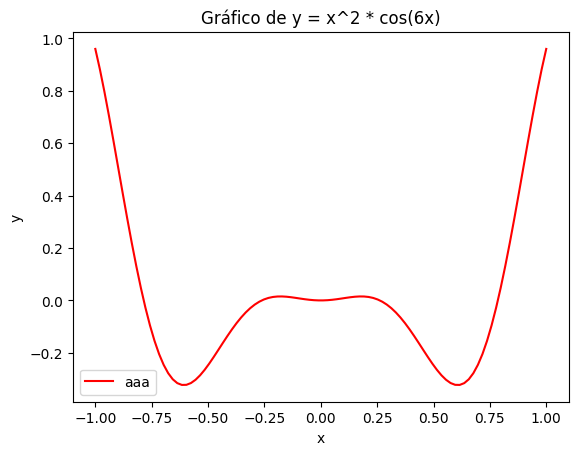

In [4]:
# plt.plot(x,y,'r-', label = 'aaa')
# plt.
plt.plot(x, y, 'r-', label='aaa')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de y = x^2 * cos(6x)')
plt.legend()
plt.show()

In [12]:
def f(x):
    y = x**2 * np.cos(6*x)
    return y



    
def f1p(x):
    y = 2 * x * np.cos(6*x) + x**2 * (-np.sin(6*x)*6)
    return y

In [21]:
def mi_optimizador(x0,g,g1p,lr = 0.01,maxiter = 100,tol=1E-5):
    solucion = []
    valor_obj= []
    k = 0
    solucion.append(x0)
    valor_obj.append(g(x0))
    dif_sol=1
    while (k < maxiter and dif_sol > tol):
        x_new = solucion[k] - lr * g1p(solucion[k])
        solucion.append(x_new)
        valor_obj.append(g(x_new))
        k += 1
        dif_sol = np.abs(solucion[k] -solucion[k-1])
    return (solucion,valor_obj,k)

In [36]:
sol_1Dcongrad,valorObj1D,k1Dcongrad = mi_optimizador(x0=0.25, g=f, g1p=f1p)

In [32]:
print(sol_1Dcongrad)

[0.25, 0.25338692019142667, 0.25697862534340515, 0.2607906095874048, 0.26483966996924707, 0.2691439899638688, 0.2737232136151926, 0.27859850292815697, 0.28379256830588806, 0.28932965813133904, 0.29523548886227946, 0.30153709108355115, 0.30826253975625106, 0.31544052850212345, 0.3230997385656436, 0.331267944063549, 0.3399707881036689, 0.3492301624715735, 0.3590621317077056, 0.36947436735889355, 0.38046310845858883, 0.39200974846550346, 0.40407727218746087, 0.4166069244243412, 0.4295156634855931, 0.44269509110963495, 0.4560125850542445, 0.46931521288166544, 0.48243662462657083, 0.49520653403906406, 0.5074617372538156, 0.5190571052507938, 0.5298748412621828, 0.5398306140881576, 0.5488758698687323, 0.5569964418342843, 0.5642082465296799, 0.5705512040119617, 0.5760825300683728, 0.5808703194269548, 0.5849880089186776, 0.5885099926660569, 0.5915084201949173, 0.5940510586431146, 0.5962000292115356, 0.5980112121671074, 0.5995341311433148, 0.6008121587433531, 0.6018829203120479, 0.60277880506120

In [33]:
sol_final = sol_1Dcongrad[k1Dcongrad]

In [34]:
sol_final

0.6072216425159129

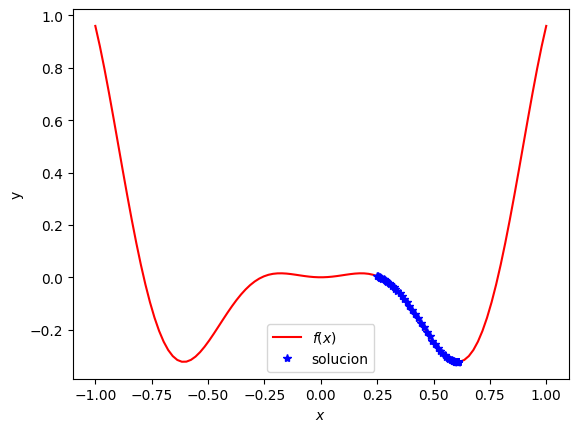

In [39]:
plt.plot(x, y, 'r-', label='$f(x)$')
plt.plot(sol_1Dcongrad,valorObj1D,'b*',label = 'solucion')
plt.xlabel('$x$')
plt.ylabel('y')
plt.legend()
plt.show()

In [45]:
sol_1Dcongrad,valorObj,k1Dcongrad = mi_optimizador(x0=0.25,g=f,g1p=f1p,lr=0.1)

ValueError: x and y must have same first dimension, but have shapes (30,) and (75,)

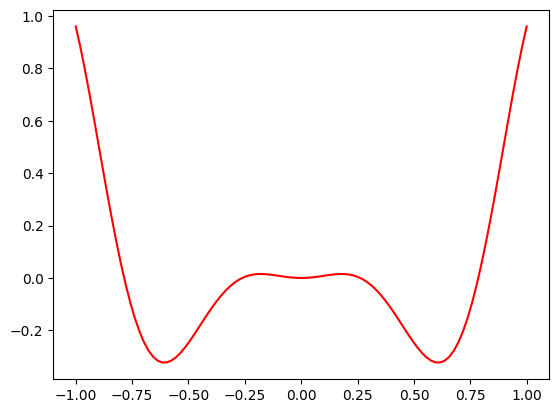

In [46]:
plt.plot(x, y, 'r-', label='$f(x)$')
plt.plot(sol_1Dcongrad,valorObj1D,'b*',label = 'solucion')
plt.xlabel('$x$')
plt.ylabel('y')
plt.legend()
plt.show()

Ahora imaginemos que no sabemos derivar
Pero conocemos la aproximacion numerica de la derivada de f en x

$$
f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}
$$

In [49]:
def deriv_num(x0,f,h=1E-2):
    y = (f(x0 + h) - f(x0-h))/(2*h)
    return y

In [51]:
f1p(0.25)

-0.33869201914266894

In [53]:
deriv_num(0.25,f)

-0.33912940550891535

In [59]:
def mi_optimizador_gradnum(x0,g,lr = 0.01,maxiter = 100,tol=1E-5):
    solucion = []
    valor_obj= []
    k = 0
    solucion.append(x0)
    valor_obj.append(g(x0))
    dif_sol=1
    while (k < maxiter and dif_sol > tol):
        x_new = solucion[k] - lr * deriv_num(solucion[k],g)
        solucion.append(x_new)
        valor_obj.append(g(x_new))
        k += 1
        dif_sol = np.abs(solucion[k] -solucion[k-1])
    return (solucion,valor_obj,k)

In [60]:
sol_1Dsingrad,valorObjsin,k1Dsingrad = mi_optimizador_gradnum(x0=0.25,g=f)

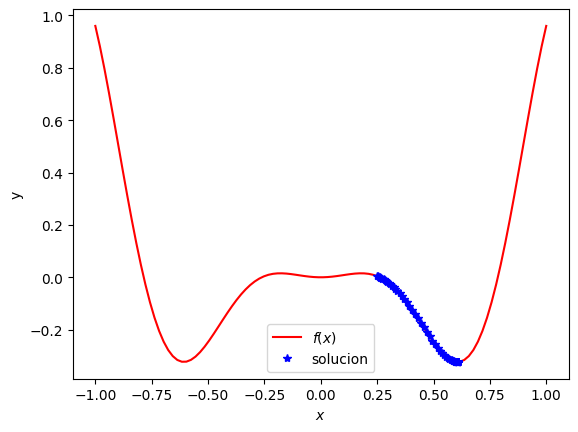

In [61]:
plt.plot(x, y, 'r-', label='$f(x)$')
plt.plot(sol_1Dsingrad,valorObjsin,'b*',label = 'solucion')
plt.xlabel('$x$')
plt.ylabel('y')
plt.legend()
plt.show()

usemos librerias

In [62]:
from scipy.optimize import minimize

In [64]:
res_opt1d = minimize(f,0.25,method= 'L-BFGS-B')

In [65]:
res_opt1d

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -0.32327303365987703
        x: [ 6.073e-01]
      nit: 3
      jac: [ 2.776e-08]
     nfev: 20
     njev: 10
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

Problema en 2D
$$
f(x_1,x_2) = x_1² \cos(6x_1) + x_1² \cos(6x_2)
$$
Una version general

$$
f(x_1,\ldots,x_2) = sum{}
$$

In [73]:
def mi_f(x):
    y = [t**2 *np.cos(6*t) for t in x]
    y= np.array(y).sum()
    return y

In [74]:
mi_f(np.array([0.25,0.25]))

0.008842150208462863

In [80]:
n_points = 50
X = np.linspace(-1,1,n_points) 
Y = X.copy()
X,Y = np.meshgrid(X,Y)

In [82]:
Z = [mi_f(np.array([X[i,j],Y[i,j]])) for i in range(n_points) for j in range(n_points)]

In [83]:
len(Z)

2500

In [85]:
Z = np.array(Z).reshape([n_points,n_points])

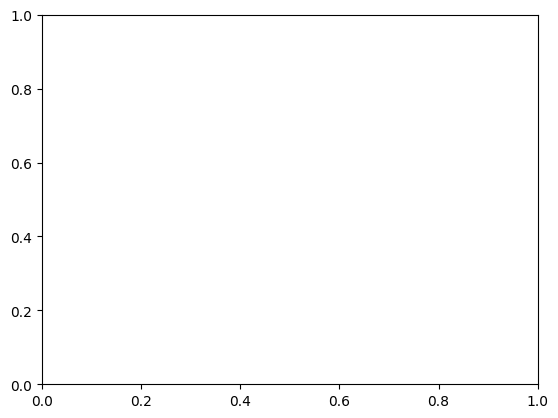

In [87]:
fig , ax = plt.subplots()
#ax.surface(X,Y,Z)
plt.show()

In [ ]:
fig , ax = plt.subplots()
ax.surface(X,Y,Z)
plt.show()

In [ ]:
def mi_f_grad(x):
    

OPTIMIZADOR CON GRAIENTE